Use keras fashion mnist dataset from https://keras.io/datasets/ to build a neural network. Figure out,
 - 1. Optiomal number of hidden layers and neurons in each hidden layer that can give you best accuracy
 - 2. Optional accuracy score

In [2]:
# import required libraries for keras fashion mnist dataset
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# load the fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0 # normalize the images
x_test = x_test / 255.0 # normalize the images

In [38]:
print(x_train.shape)

(60000, 28, 28)


In [39]:
x_test.shape

(10000, 28, 28)

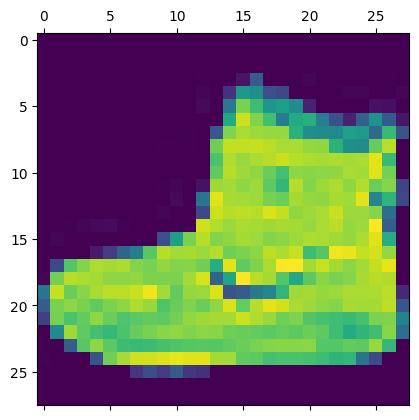

In [40]:
plt.matshow(x_train[0])

In [41]:
# Reshape the data for Dense layers
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [43]:
# Define a function to create a model
def create_model(neurons_per_layer, activation):
    model = keras.Sequential([keras.layers.InputLayer(input_shape=(28*28,))])
    for neurons in neurons_per_layer:
        model.add(keras.layers.Dense(neurons, activation=activation))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [58]:
from sklearn.model_selection import ParameterGrid
# Define the hyperparameter grid
neurons_options = [[128], [128, 64], [256, 128, 64]] # 3 options for neurons per layer
activation_options = ['sigmoid'] #['relu', 'tanh', 'sigmoid', 'leaky_relu'] # 4 options for activation

# Create the parameter grid
param_grid = list(ParameterGrid({'neurons_per_layer': neurons_options, 'activation': activation_options}))

# Print the parameter grid
print("Parameter Grid:")
for params in param_grid:
    print(params['neurons_per_layer'], params['activation'])

Parameter Grid:
[128] sigmoid
[128, 64] sigmoid
[256, 128, 64] sigmoid


In [62]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Function to train and evaluate models for a given activation
def train_and_evaluate(activation):
    neurons_options = [[128], [128, 64], [256, 128, 64]]
    param_grid = list(ParameterGrid({'neurons_per_layer': neurons_options}))
    
    best_model = None
    best_accuracy = 0
    history_dict = {}
    
    for params in param_grid:
        print(f"Training with layers: {params['neurons_per_layer']}, Activation: {activation}")
        activation_function = keras.layers.LeakyReLU(alpha=0.01) if activation == 'leaky_relu' else activation
        model = create_model(params['neurons_per_layer'], activation_function)
        history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
        accuracy = max(history.history['val_accuracy'])
        history_dict[str(params['neurons_per_layer'])] = history.history
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_params = params
    
    print(f"Best model configuration for activation '{activation}': {best_params}, Accuracy: {best_accuracy:.4f}")
    
    # Plot training history
    for config, history in history_dict.items():
        plt.plot(history['val_accuracy'], label=f'Config: {config}')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.title(f'Model Performance Comparison - Activation: {activation}')
    plt.show()
    
    return best_model, best_accuracy

Training with layers: [128], Activation: relu
Training with layers: [128, 64], Activation: relu
Training with layers: [256, 128, 64], Activation: relu
Best model configuration for activation 'relu': {'neurons_per_layer': [128]}, Accuracy: 0.8868


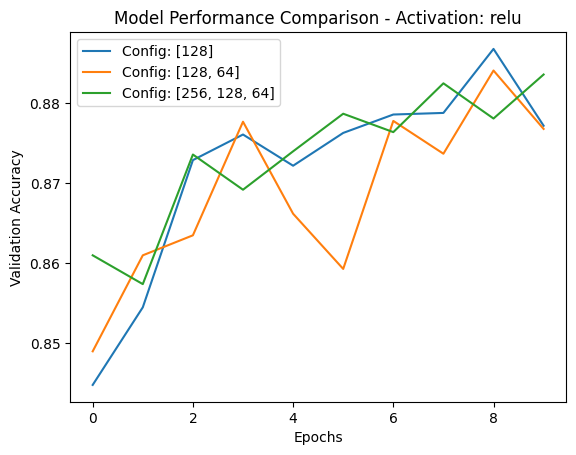

In [64]:
# Example: Run for 'relu'
best_model_relu, best_accuracy_relu = train_and_evaluate('relu')


Training with layers: [128], Activation: tanh
Training with layers: [128, 64], Activation: tanh
Training with layers: [256, 128, 64], Activation: tanh
Best model configuration for activation 'tanh': {'neurons_per_layer': [128]}, Accuracy: 0.8837


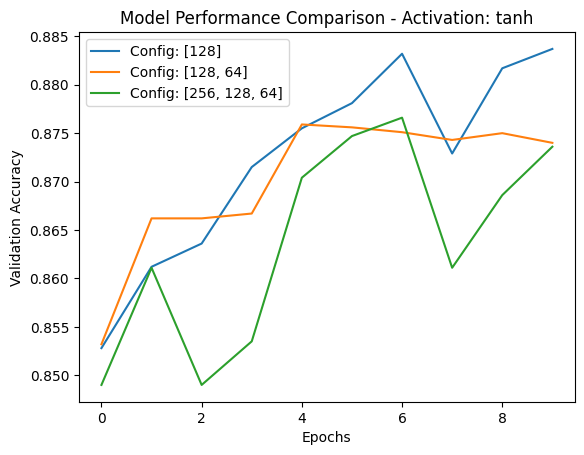

In [65]:
# Example: Run for 'tanh'
best_model_relu, best_accuracy_relu = train_and_evaluate('tanh')

Training with layers: [128], Activation: sigmoid
Training with layers: [128, 64], Activation: sigmoid
Training with layers: [256, 128, 64], Activation: sigmoid
Best model configuration for activation 'sigmoid': {'neurons_per_layer': [256, 128, 64]}, Accuracy: 0.8849


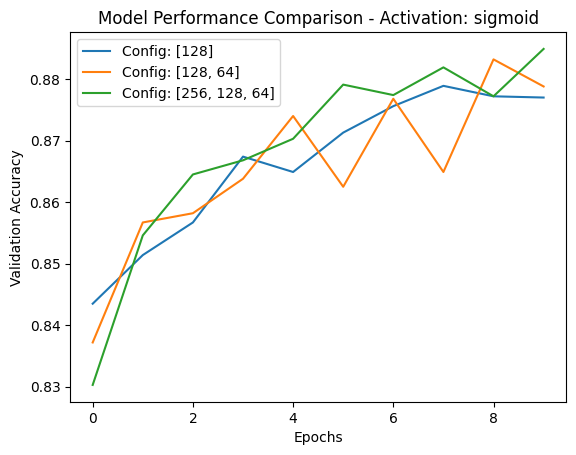

In [66]:
# Example: Run for 'sigmoid'
best_model_relu, best_accuracy_relu = train_and_evaluate('sigmoid')

Training with layers: [128], Activation: leaky_relu
Training with layers: [128, 64], Activation: leaky_relu
Training with layers: [256, 128, 64], Activation: leaky_relu
Best model configuration for activation 'leaky_relu': {'neurons_per_layer': [128, 64]}, Accuracy: 0.8864


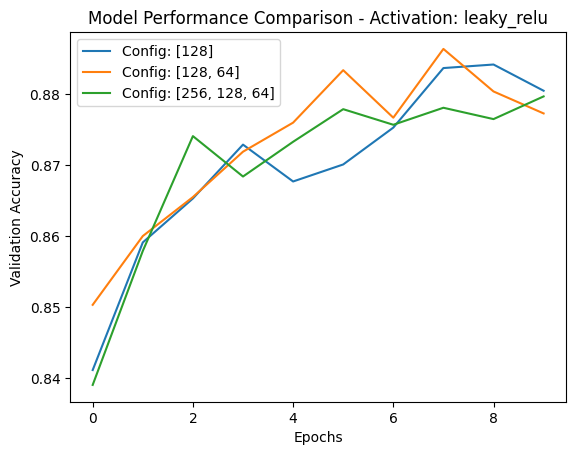

In [67]:
# Example: Run for 'sigmoid'
best_model_relu, best_accuracy_relu = train_and_evaluate('leaky_relu')

- relu activation function:
   - Best Accuracy: 0.8868, 
   - Best Parameters: {'activation': 'relu', 'neurons_per_layer': [256, 128, 64]}

- tanh activation function:
  - Best Accuracy: 0.8837,
  - Best Parameters: {'activation': 'tanh', 'neurons_per_layer': [128]}

- sigmoid activation function
  - Best Accuracy: 0.8849, 
  - Best Parameters: {'activation': 'sigmoid', 'neurons_per_layer': [256, 128, 64]}

- leaky-relu activation function
  - Best Accuracy: 0.8864, 
  - Best Parameters: {'activation': 'sigmoid', 'neurons_per_layer': [128, 64]}